In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

# Update to include make and model
df = pd.read_csv('data/car_prices.csv', usecols=["year", "odometer", "sellingprice"]).replace({'-': np.nan, '': np.nan}).dropna()

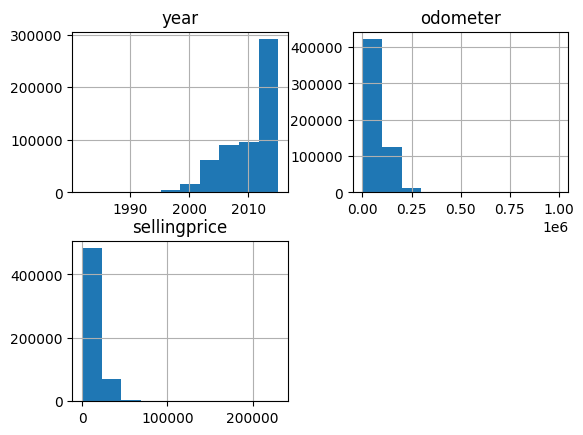

In [18]:
# Data distribution histograms
df.hist()
pyplot.show()

array([[<Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='odometer', ylabel='year'>,
        <Axes: xlabel='sellingprice', ylabel='year'>],
       [<Axes: xlabel='year', ylabel='odometer'>,
        <Axes: xlabel='odometer', ylabel='odometer'>,
        <Axes: xlabel='sellingprice', ylabel='odometer'>],
       [<Axes: xlabel='year', ylabel='sellingprice'>,
        <Axes: xlabel='odometer', ylabel='sellingprice'>,
        <Axes: xlabel='sellingprice', ylabel='sellingprice'>]],
      dtype=object)

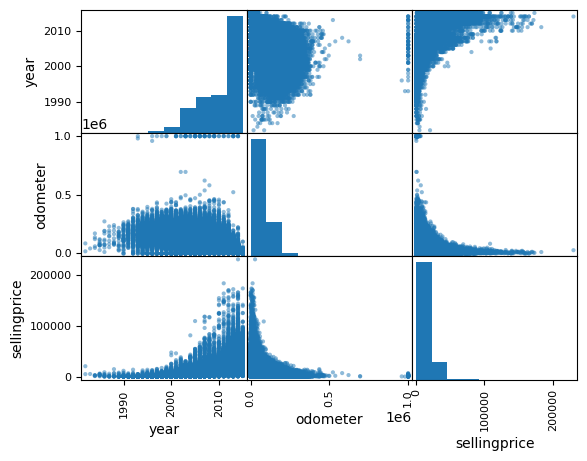

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

In [23]:
from sklearn.model_selection import train_test_split

# Choose variables
# Independent variables:
x = df.drop(columns=['sellingprice'])

# Dependent variables
y = df[['sellingprice']].copy()

# Split the model into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression

# Train a model on the split dataset
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
# We can now use the model to make an estimate based on input data
user_input_cols = ['year', 'odometer']
user_input = [[2000, 1000]]
user_input_df = pd.DataFrame(np.array(user_input), columns=user_input_cols)

print(model.predict(user_input_df))

[[9203.10209601]]


In [ ]:
# Now that we have a working model, we can analyze its accuracy using the testing set
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

np.float64(58789713.65810186)